In [1]:
import pandas as pd
import re
from bs4 import BeautifulSoup
from sentence_transformers import SentenceTransformer

c:\Users\santi\Documents\GitHub\Tesis\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Redes neuronales basdas en grafos

# Entities Exploration

## Concept

In [3]:
concept_df = pd.read_json("../data/MOOCCube/entities/concept.json",lines=True)

In [4]:
concept_df.shape

(114563, 4)

In [5]:
concept_df.sample(5)

,id,name,en,explanation
93735,K_奖金制_管理科学技术,奖金制,premium plan,学科：管理科学技术_组织行为与人力资源管理_薪酬管理 定义：给予达到工作目标的员工事先设定的...
42165,K_走读生_教育学,走读生,non-resident student,学科：教育学_高等教育_高校招生与培养 定义：按规定在校修学但不在学校住宿的学生。 见载：《...
7054,K_土壤改良_农学,土壤改良,soil amelioration,学科：农学_土地、土壤与肥料 英文：soil amelioration ;soil impr...
87944,K_磁稳定性_电气工程,磁稳定性,magnetic stability,学科：电气工程_磁性材料 见载：《电气工程名词》第一版
62876,K_滚道中部_机械工程,滚道中部,middle raceway,学科：机械工程_机械零件与传动 _机械零件 _滚动轴承 定义：滚道表面上，滚道两边缘间的中点...


## Course

In [6]:
course_df = pd.read_json("../data/MOOCCube/entities/course.json",lines=True)

In [7]:
course_df.shape

(706, 8)

In [8]:
course_df.sample(5)

,id,name,prerequisites,about,core_id,video_order,display_name,chapter
342,C_course-v1:TsinghuaX+00670122X+2019_T1,现代生活美学——插花之道（2019春）,本课程为文化素质基础课，无先修要求,<p>\r\n\t<span>中国文人生活的厅堂之雅，在宋代已形成“文人四艺”的琴棋书画，和...,C_course-v1:TsinghuaX+00670122X+sp,"[V_9b1c33ae4e6b4ff899d2daa65a4ae24f, V_8fe865b...","[相忘于山水, 为什么需要生活美学, 生活美学微访谈, 课程结构与内容, 其他学习建议, 任...","[01.01.01.01, 01.02.01.01, 01.03.01.01, 01.04...."
467,C_course-v1:TsinghuaX+40260173X+2019_T1,数字集成电路分析与设计（2019春）,电路原理和数字逻辑电路的基本概念是必须的。半导体器件最好懂一点，但不用太多。当然，简单的微积...,<p>本课程主要从晶体管级和电路级讲授数字集成电路的分析与设计。以CMOS集成电路为主，从回...,C_course-v1:TsinghuaX+40260173X+2019_T1,"[V_a9e3bf31379f4bb192088855eeb8d8ba, V_41f2d4a...","[Video, Video, Video, Video, Video, Video, Vid...","[02.01.01.01, 02.02.01.01, 02.03.01.01, 02.04...."
388,C_course-v1:TsinghuaX+60250131X+2019_T1,大数据科学与应用系列讲座（2019春）,无先修知识,<p>\n\t本课程以一系列大数据讲座为主线，突出实战性，激发学生学习兴趣和动力，促进学生理...,C_course-v1:TsinghuaX+60250131X+2019_T1,"[V_e0bf09d7ea894e059601cf1d56b1a350, V_3008230...","[视频, 数据思维方式的改变, 数据的假设与采集, 数据的准备, 数据的分析, 数据的解释与...","[01.01.01.01, 02.01.01.01, 02.02.01.01, 02.03...."
253,C_course-v1:CCI+ccioo1+2018_T3,医疗器械与医学创新,无,为支持公益性医疗事业的发展，完善医学知识体系，向广大在校学生和社会学习者以及医疗工作者传递心...,C_course-v1:CCI+ccioo1+2018_T3,"[V_95843b3ed8894e519804ba7567a10a29, V_6f8f321...","[心血管介入创新发展史, 心血管创新的现状和机遇, 全球化与创新, 全球化与创新（2）, 发...","[01.01.01.01, 01.01.02.01, 01.02.01.01, 01.02...."
239,C_course-v1:JNU+07009188+2018_T2,力学与现代生活——开启科学人生,无,<p>\n\t力学是古老而又年轻的专业学科，在整个人类科学与技术发展历史中起着重要的支撑作用...,C_course-v1:JNU+07009188+2018_T2,"[V_bb8e3df8959c4aa1a3c5d4dcd7e9a29c, V_51413bc...","[Video, Video, Video, Video, Video, Video, Vid...","[01.01.01.01, 01.02.01.01, 01.03.01.01, 01.05...."


In [9]:
def remove_html_and_carriage_returns(text):
    soup = BeautifulSoup(text, "html.parser")
    text_without_html = soup.get_text().replace("\n","").replace("\r","").replace("\t","")
    
    return text_without_html

course_df["about"] = course_df["about"].apply(remove_html_and_carriage_returns)
course_df.sample(5)

,id,name,prerequisites,about,core_id,video_order,display_name,chapter
290,C_course-v1:YLVTC+2018111301X+2018_T2,市场营销技能,无,本课程以企业市场营销活动过程为导向，力图综合描绘市场营销的核心理念与基本技能框架。课程以消费...,C_course-v1:YLVTC+2018111301X+2018_T2,"[V_6457fa48e8024860a9824e085c612432, V_39f4e5a...","[从肯德基飞进北京城认识营销活动, 观看视频学徒认识营销活动, 市场营销的涵义及其相关概念,...","[01.02.01.01, 01.02.02.01, 01.03.01.01, 01.03...."
12,C_course-v1:TsinghuaX+70120073X+sp,有限元分析及应用（自主模式）,如果学生先期学习过材料力学、弹性力学等相关课程，将有助于本课程的学习，但这并非必须。,有限元方法(finite element method)：基于数学力学原理，采用计算机信息化...,C_course-v1:TsinghuaX+70120073X+sp,"[V_5b0bb6cd9b6344649a2e22bbad958052, V_a09e0ca...","[Video, Video 1.1, Video 1.2, Video 1.3, Video...","[01.01.01.01, 02.01.01.01, 02.02.01.01, 02.03...."
484,C_course-v1:TsinghuaX+30640014X+2019_T1,生活英语听说（2019春）,无先修要求，适用于任何人群。已掌握英语字母的读写和基本发音规律的初级学习者亦可学习。,语言最重要的功能就是交流。在交流中我们要知道如何开始一个对方感兴趣的话题，回答别人的提问，自...,C_course-v1:TsinghuaX+30640014X+sp,"[V_d11e19d5fabe4e38b8b908ff0839c123, V_98209e8...","[Introduction, Text, Useful Words and Expressi...","[02.01.01.02, 02.02.01.02, 02.03.01.02, 02.04...."
588,C_course-v1:CSU+2018020201X+2019_T1,主题英语（2019春）,无,本课程是大学生提升国际视野和跨文化交流能力的有益阶梯！本课程按主题分模块与你共同探讨英语学习...,C_course-v1:CSU+2018020201X+sp,"[V_a1b0e1d042bf4244808e768c93112705, V_424bda4...","[Video, Video, Video, Video, Video, Video, Vid...","[01.01.01.01, 01.02.01.01, 01.03.01.01, 01.04...."
35,C_course-v1:MicrosoftX+Microsoft101+sp,微软亚洲研究院大数据系列讲座（自主模式）,建议高年级本科生和研究生学习,计算机科学正在前所未有的影响着我们的生活，它令我们的生活更加简单方便、更为丰富充实。依托于计...,C_course-v1:MicrosoftX+Microsoft101+sp,"[V_67b0853125c1452680fb0f9b18f6f489, V_ac16660...","[什么是大数据(What is big data?), 为什么大数据是当前热点（Why bi...","[01.01.01.01, 01.02.01.01, 01.03.01.01, 01.04...."


In [10]:
# sentences = []
# course_ids = [] 
# for index, row in course_df.iterrows():
#     course_ids.append(row["id"])
#     sentences.append(row["about"])
# model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v1')
# embeddings = model.encode(sentences)


In [11]:
# course_df = course_df.explode('video_order').reset_index()
# course_df.head(5)

In [12]:
# course_df = course_df.drop('index', axis=1)
# course_df.head(5)

## Papers

In [13]:
paper_df = pd.read_json("../data/MOOCCube/entities/paper.json",lines=True)

In [14]:
paper_df.shape

(679790, 14)

In [15]:
paper_df.sample(5)

,id,name,abstract,authors,doi,lang,num_citation,pdf,sourcetype,title,venue,year,pages,urls
382178,P_56d91b2adabfae2eee7ae3dd,,,"[{'id': '53f4369bdabfaeee229aced9', 'name': 'm...",10.1038/nm1523,en,1716,NaN,publication,Calreticulin exposure dictates the immunogenic...,"{'info': {'name': 'Nature Medicine'}, 'issue':...",2007,"{'end': '', 'start': ''}",[http://dx.doi.org/10.1038/nm1523]
457502,P_53e9bbf5b7602d9704851b5a,,,"[{'id': '53f43011dabfaedf435384fa', 'name': 'C...",,en,14,NaN,publication,Inside the Content: The Breadth and Depth of E...,"{'issue': '', 'volume': ''}",2005,"{'end': '', 'start': ''}",NaN
107284,P_56d845cbdabfae2eeead2d6e,,,[{'name': 'guidi'}],,en,0,NaN,publication,MANIPULATOR FOR DISMANTLING AND FASTENING PRES...,"{'issue': '', 'volume': ''}",1965,"{'end': '', 'start': ''}",NaN
567034,P_53e9ba28b7602d97046335ec,,Distributed generation systems usually include...,"[{'id': '562d9d2e45cedb3398e843ca', 'name': 'P...",10.1109/TIE.2012.2208429,en,56,NaN,publication,Compact Integrated Energy Systems for Distribu...,{'info': {'name': 'IEEE Transactions on Indust...,2012,"{'end': '1502', 'start': '1492'}","[http://dx.doi.org/10.1109/TIE.2012.2208429, h..."
140994,P_53e9b2e0b7602d9703d947b3,,Summary 19 “endodermal sinus tumors” of infant...,"[{'id': '53f3b0a2dabfae4b34b19fa5', 'name': 'W...",10.1007/BF01230860,en,22,NaN,publication,Endodermal sinus tumor or orchioblastoma in ch...,"{'info': {'name': 'Virchows Archiv. A, Patholo...",1974,"{'end': '110', 'start': '93'}","[http://dx.doi.org/10.1007/BF01230860, http://..."


## School

In [16]:
school_df = pd.read_json("../data/MOOCCube/entities/school.json",lines=True)

In [17]:
school_df.shape

(208, 3)

In [18]:
school_df.sample(5)

,id,name,about
181,S_microdegree,,
33,S_McGillX,麦吉尔大学,"麦吉尔大学（McGill University), 简称McGill或麦大, 始建于1821..."
138,S_WUT,武汉理工大学,武汉理工大学（Wuhan University of Technology，WUT），简称武...
95,S_WellesleyX,韦尔斯利大学,韦尔斯利学院（Wellesley College）由当地乡绅 Durant 夫妇注册于187...
81,S_qdu,青岛大学,青岛大学（Qingdao University）是由山东省与青岛市共建的山东省属重点综合大学...


## Teacher

In [19]:
teacher_df = pd.read_json("../data/MOOCCube/entities/teacher.json",lines=True)

In [20]:
teacher_df.shape

(1738, 3)

In [21]:
teacher_df.sample(5)

,id,name,about
1730,T_Gerald Sussman,Gerald Sussman,Gerald Sussman教授是MIT电气工程专业的教授。他是计算机领域享有盛誉的教育家。...
296,T_Ela Ben-Ur,Ela Ben-Ur,Ela担任i2i Experience的顾问、教练和导师，专注与设计研发和策略。她曾在IDE...
1127,T_戎贤,戎贤,戎贤，博士，教授，博士生导师。河北省教学名师，获省部级科技进步奖四项、教学成果奖三项、国家专...
866,T_杨畅,杨畅,博士，副教授，贵州医科大学硕士研究生导师，研究方向为新型药物传递系统、造影材料与中药新剂型的...
820,T_马凯,马凯,马凯，硕士，副教授，北京服装学院 服装艺术与工程学院教师。1999年于北京航空航天大学获工学...


## User

In [2]:
user_df = pd.read_json("../data/MOOCCube/entities/user.json",lines=True)

In [3]:
user_df.shape

(199199, 4)

In [4]:
user_df.sample(5)

,id,name,course_order,enroll_time
72780,U_11758928,宾映真,"[C_course-v1:BNU+2018091301X+2019_T1, C_course...","[2019-05-15 20:05:45, 2019-05-19 08:12:23]"
23952,U_7813468,资之山,"[C_course-v1:TsinghuaX+TSINGHUA107+sp, C_cours...","[2019-02-26 19:10:27, 2018-09-11 17:08:08, 201..."
92125,U_10730987,何半,"[C_course-v1:TsinghuaX+10450034_1X_2X+2019_T1,...","[2019-03-13 23:30:12, 2019-03-12 00:25:47]"
194646,U_5392896,寒冰兰,"[C_course-v1:TsinghuaX+TSINGHUA107+sp, C_cours...","[2018-08-27 12:17:25, 2018-08-27 12:08:00]"
188379,U_11855700,詹嘉木,"[C_course-v1:TsinghuaX+00740123X+2019_T1, C_co...","[2019-06-05 09:52:54, 2019-05-24 16:26:16]"


In [25]:
i = 0
for index, row in user_df.iterrows():
    if len(row["course_order"])>7 and i<3:
        i +=1
        print(row["course_order"])
    

['C_course-v1:TsinghuaX+20430064_2X+sp', 'C_course-v1:TsinghuaX+02070251X+2019_T1', 'C_course-v1:TsinghuaX+0350161X_2015_T2+sp', 'C_course-v1:TsinghuaX+60240013X+sp', 'C_course-v1:TsinghuaX+01030132X+sp', 'C_course-v1:TsinghuaX+20250103X+sp', 'C_course-v1:TsinghuaX+20220214X+2019_T1', 'C_course-v1:TsinghuaX+02070251X+sp', 'C_course-v1:TsinghuaX+20220053X_2015_T2+sp', 'C_course-v1:TsinghuaX+20350033X+sp']
['C_course-v1:TsinghuaX+30640014X+2019_T1', 'C_course-v1:TsinghuaX+00612643X+sp', 'C_course-v1:TsinghuaX+00612642X+2019_T1', 'C_course-v1:TsinghuaX+20250103X+sp', 'C_course-v1:TsinghuaX+30640014X+sp', 'C_course-v1:TsinghuaX+00701032X+sp', 'C_course-v1:HNU+GE14068+2019_T1', 'C_course-v1:HEBNU+2017011901X+sp', 'C_course-v1:TsinghuaX+00612642X+sp']
['C_course-v1:gmc+3060511+2018_T2', 'C_course-v1:WageningenX+NUTR101x+sp', 'C_course-v1:TsinghuaX+80000271X+sp', 'C_course-v1:TsinghuaX+00040132X+sp', 'C_course-v1:MIL+MIL2016001+sp', 'C_course-v1:UQx+BIOIMG101x+sp', 'C_course-v1:PSFFC+20181024

## Video

In [26]:
video_df = pd.read_json("../data/MOOCCube/entities/video.json",lines=True)

In [27]:
video_df.shape

(38181, 5)

In [28]:
video_df.sample(5)

,id,name,start,end,text
1559,V_627948600f084872913ea6f0920405c8,02-02,"[9615, 11687, 14904, 18064, 19785, 20957, 2371...","[11447, 14296, 17720, 19376, 20752, 22776, 247...","[您好 欢迎来到, 钢筋混凝土耐久性导论课程, 路老师上节课我们提到了, 金属腐蚀的三要素,..."
8376,V_ffe72189c31540c0b550df018edee112,理想气体温标,"[22304, 23584, 24626, 26934, 29304, 30431, 336...","[23549, 24625, 26933, 29303, 30430, 33612, 355...","[同学们好, 那么我们在前面的章节, 多次提到了温度这样一个的概念, 但事实上我们还没有给出..."
1477,V_852469520b764f7f86dc9bc354d3a363,A4 干涉实验,"[10445, 11611, 15451, 17234, 19097, 21737, 239...","[11611, 15451, 17234, 19097, 21737, 23988, 267...","[大家好, 这次课我们来看一下干涉实验, 基于激光的干涉实验, 光路是比较好调的, 只要保证..."
32403,V_c6d92316ebb24cd6952ccfc21e91788c,2-5 吸虫各论之生活史,"[23864, 27899, 30693, 32611, 34601, 38228, 399...","[26731, 30226, 31965, 34201, 37744, 39716, 426...","[下面要给同学们讲生活史的各论, 这里我们仅仅详细介绍, 肺吸虫的生活史, 而其他的两种吸虫..."
24565,V_4b5588a35e8a4dc3bfb06a32632394c2,第四节 文帝用人,"[22339, 23634, 28069, 30968, 32658, 35160, 373...","[23331, 26880, 30211, 32225, 34105, 36846, 391...","[我想这节的第二个问题, 我要谈谈杨坚的政治里面的用人, 我想里有两点可以值得谈, 一个新的..."


### Relación Curso Usuario

In [8]:
user_df = user_df[user_df["course_order"].apply(lambda x:len(x) >= 5)]
user_df["num_course_taken"] = user_df["course_order"].apply(len)
user_df.head()

,id,name,course_order,enroll_time,num_course_taken
0,U_7001215,李喜锋,"[C_course-v1:TsinghuaX+00740043_2x_2015_T2+sp,...","[2017-05-01 11:07:53, 2017-05-17 10:07:17, 201...",5
3,U_7423998,郭海滨,"[C_course-v1:TsinghuaX+30240184_2X+sp, C_cours...","[2017-08-16 10:38:11, 2018-07-01 18:24:24, 201...",7
4,U_545306,李其艳,"[C_course-v1:TsinghuaX+20430064_2X+sp, C_cours...","[2018-09-05 15:40:40, 2019-02-28 10:08:49, 201...",10
7,U_7594103,巴鹏,"[C_course-v1:TsinghuaX+30240184+sp, C_course-v...","[2018-07-15 20:45:57, 2018-01-18 20:59:34, 201...",6
13,U_3234246,称语山,"[C_course-v1:TsinghuaX+00740123_X+sp, C_course...","[2017-02-27 22:15:55, 2018-12-08 20:23:01, 201...",5


In [13]:
user_df.shape

(34917, 5)

In [10]:
user_mean = user_df['num_course_taken'].mean()
user_std = user_df['num_course_taken'].std()
user_max = user_df['num_course_taken'].max()
user_min = user_df['num_course_taken'].min()

In [11]:
print("Promedio: " + str(user_mean))
print("Std: " + str(user_std))
print("Max: " + str(user_max))
print("Min: " + str(user_min))
print("Mediana: " + str(user_df['num_course_taken'].median()))
print("Moda: " + str(user_df['num_course_taken'].mode().values[0]))

Promedio: 7.829910931637884
Std: 5.119661147171457
Max: 161
Min: 5
Mediana: 6.0
Moda: 5


In [9]:
import matplotlib.pyplot as plt

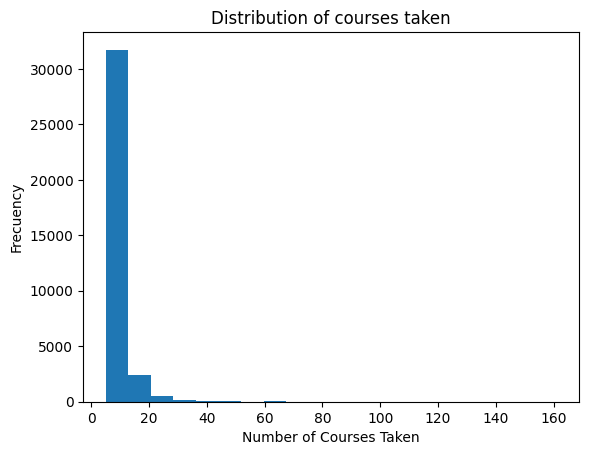

In [12]:
plt.hist(user_df['num_course_taken'], bins=20)
plt.xlabel('Number of Courses Taken')
plt.ylabel('Frecuency')
plt.title('Distribution of courses taken')
plt.show()

In [50]:
print(user_std)

3.020514472228401


In [55]:
all_courses = [movie for movies in user_df['course_order'] for movie in movies]

In [61]:
course_counts = pd.Series(all_courses).value_counts().reset_index()
course_counts.columns = ['course_id', 'user_count']
print(course_counts)

                                      course_id  user_count
0             C_course-v1:TsinghuaX+30240184+sp       32914
1    C_course-v1:TsinghuaX+00740043X_2015_T2+sp       31491
2            C_course-v1:TsinghuaX+30640014X+sp       30177
3                   C_course-v1:MITx+6_00_1x+sp       18473
4            C_course-v1:TsinghuaX+30240243X+sp       17265
..                                          ...         ...
693               C_course-v1:gmc+30102+2018_T2           1
694         C_course-v1:BNU+CHE21128011+2019_T1           1
695             C_course-v1:CIE+JD_2017+2019_T1           1
696         C_course-v1:HNU+20180424001+2018_T1           1
697        C_course-v1:XJTU+2018122507X+2018_T2           1

[698 rows x 2 columns]


In [95]:
mean_course = course_counts['user_count'].mean()
std_course = course_counts['user_count'].std()
min_course = course_counts['user_count'].min()
max_course = course_counts['user_count'].max()
median_course = course_counts['user_count'].median()
mode_course = course_counts['user_count'].mode().values[0]


In [96]:
print("Promedio: " + str(mean_course))
print("Std: " + str(std_course))
print("Min: " + str(min_course))
print("Max: " + str(max_course))
print("Mediana: " + str(median_course))
print("Moda: " + str(mode_course))

Promedio: 978.1561604584527
Std: 2742.658014965899
Min: 1
Max: 32914
Mediana: 191.0
Moda: 6


In [66]:
usuarios_por_numero_de_peliculas = user_df['num_course_taken'].value_counts().reset_index()
usuarios_por_numero_de_peliculas.columns = ['course_num', 'num users']
usuarios_por_numero_de_peliculas = usuarios_por_numero_de_peliculas.sort_values(by='course_num')

print(usuarios_por_numero_de_peliculas)

    course_num  num users
0            2     103776
1            3      40220
2            4      20286
3            5      11550
4            6       7079
..         ...        ...
70         122          1
69         123          1
74         149          1
79         154          1
82         161          1

[84 rows x 2 columns]


### Relacion Curso-Paper

In [109]:
# course_concept_df = pd.read_json("../data/MOOCCube/relations/course-concept.json",lines=True)
with open("../data/MOOCCube/relations/concept-paper.json", "r",encoding="utf-8") as file:
    paper_ids = []
    concept_ids = []
    for line in file:
        line = line.split("\t")
        paper_ids.append(line[1].replace("\n",""))
        concept_ids.append(line[0].replace("\n",""))
        

In [110]:
paper_concept_relation_df = pd.DataFrame({"id_paper":paper_ids,"id_concept":concept_ids})

In [111]:
paper_concept_relation_df.sample(5)

,id_paper,id_concept
677647,P_56d8b9f7dabfae2eee270c17,K_嵌入型洪积扇_地理学
269368,P_53e9bc54b7602d97048cec99,K_阻燃结构_电气工程
559771,P_53e9a19ab7602d9702a8c078,K_焊接检验_机械工程
469484,P_53e9ba28b7602d9704630f13,K_节径比_电气工程
840635,P_53e9a7e3b7602d9703122f3f,K_分形测度_物理学


In [118]:
mean = paper_concept_relation_df.groupby('id_paper')['id_concept'].count().mean()
std = paper_concept_relation_df.groupby('id_paper')['id_concept'].count().std()
min_v = paper_concept_relation_df.groupby('id_paper')['id_concept'].count().min()
max_v = paper_concept_relation_df.groupby('id_paper')['id_concept'].count().max()
median = paper_concept_relation_df.groupby('id_paper')['id_concept'].count().median()
mode = paper_concept_relation_df.groupby('id_paper')['id_concept'].count().mode().values[0]

In [119]:
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 1.4692949293164066
Std: 5.428915694816066
Min: 1
Max: 807
Mediana: 1.0
Moda: 1


In [120]:
mean = paper_concept_relation_df.groupby('id_concept')['id_paper'].count().mean()
std = paper_concept_relation_df.groupby('id_concept')['id_paper'].count().std()
min_v = paper_concept_relation_df.groupby('id_concept')['id_paper'].count().min()
max_v = paper_concept_relation_df.groupby('id_concept')['id_paper'].count().max()
median = paper_concept_relation_df.groupby('id_concept')['id_paper'].count().median()
mode = paper_concept_relation_df.groupby('id_concept')['id_paper'].count().mode().values[0]

In [121]:
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 9.976248264565168
Std: 0.4115523306370083
Min: 1
Max: 20
Mediana: 10.0
Moda: 10


### Relación curso concepto

In [114]:
with open("../data/MOOCCube/relations/course-concept.json", "r",encoding="utf-8") as file:
    courses_ids = []
    concept_ids = []
    for line in file:
        line = line.split("\t")
        courses_ids.append(line[0])
        concept_ids.append(line[1].replace("\n",""))

In [115]:
course_concept_relation_df = pd.DataFrame({"id_course":courses_ids,"id_concept":concept_ids})

In [116]:
mean = course_concept_relation_df.groupby('id_course')['id_concept'].count().mean()
std = course_concept_relation_df.groupby('id_course')['id_concept'].count().std()
min_v = course_concept_relation_df.groupby('id_course')['id_concept'].count().min()
max_v = course_concept_relation_df.groupby('id_course')['id_concept'].count().max()
median = course_concept_relation_df.groupby('id_course')['id_concept'].count().median()
mode = course_concept_relation_df.groupby('id_course')['id_concept'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 245.6090775988287
Std: 121.38267825448973
Min: 6
Max: 899
Mediana: 234.0
Moda: 284


In [117]:
mean = course_concept_relation_df.groupby('id_concept')['id_course'].count().mean()
std = course_concept_relation_df.groupby('id_concept')['id_course'].count().std()
min_v = course_concept_relation_df.groupby('id_concept')['id_course'].count().min()
max_v = course_concept_relation_df.groupby('id_concept')['id_course'].count().max()
median = course_concept_relation_df.groupby('id_concept')['id_course'].count().median()
mode = course_concept_relation_df.groupby('id_concept')['id_course'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 6.6565215666045
Std: 15.32440326226328
Min: 1
Max: 303
Mediana: 2.0
Moda: 1


### Relación Curso Video

In [131]:
with open("../data/MOOCCube/relations/course-video.json", "r",encoding="utf-8") as file:
    course_ids = []
    video_ids = []
    for line in file:
        line = line.split("\t")
        course_ids.append(line[0].replace("\n",""))
        video_ids.append(line[1].replace("\n",""))

In [132]:
course_video_relation_df = pd.DataFrame({"id_course":course_ids,"id_video":video_ids})
course_video_relation_df.sample(5)

,id_course,id_video
9673,C_course-v1:TsinghuaX+2018031601X+2019_T1,V_622133719dd74caca32bf73261111350
22974,C_course-v1:TsinghuaX+10610224X+2019_T1,V_d767a143fd6e4e11b7389129925d3e93
34152,C_course-v1:TsinghuaX+20220332X+2019_T1,V_f59f0ed371944c5aa40935f40db882cf
3063,C_course-v1:TsinghuaX+10610193X+2019_T1,V_b6d3c29109264fe3b14104f2de990841
23144,C_course-v1:TsinghuaX+10450034_1X_2X+2019_T1,V_877895d1c13b43ef8dcfa2307c873291


In [135]:
mean = course_video_relation_df.groupby('id_course')['id_video'].count().mean()
std = course_video_relation_df.groupby('id_course')['id_video'].count().std()
min_v = course_video_relation_df.groupby('id_course')['id_video'].count().min()
max_v = course_video_relation_df.groupby('id_course')['id_video'].count().max()
median = course_video_relation_df.groupby('id_course')['id_video'].count().median()
mode = course_video_relation_df.groupby('id_course')['id_video'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 66.26345609065156
Std: 46.72288908849797
Min: 5
Max: 510
Mediana: 54.0
Moda: 32


In [136]:
mean = course_video_relation_df.groupby('id_video')['id_course'].count().mean()
std = course_video_relation_df.groupby('id_video')['id_course'].count().std()
min_v = course_video_relation_df.groupby('id_video')['id_course'].count().min()
max_v = course_video_relation_df.groupby('id_video')['id_course'].count().max()
median = course_video_relation_df.groupby('id_video')['id_course'].count().median()
mode = course_video_relation_df.groupby('id_video')['id_course'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 1.2252691129095623
Std: 0.4349653731593946
Min: 1
Max: 4
Mediana: 1.0
Moda: 1


### Relation School Course

In [143]:
with open("../data/MOOCCube/relations/school-course.json", "r",encoding="utf-8") as file:
    course_ids = []
    school_ids = []
    for line in file:
        line = line.split("\t")
        course_ids.append(line[1].replace("\n",""))
        school_ids.append(line[0].replace("\n",""))

In [144]:
school_course_relation_df = pd.DataFrame({"id_course":course_ids,"id_school":school_ids})
school_course_relation_df.sample(5)

,id_course,id_school
129,C_course-v1:McGillX+Chem181x+sp,S_McGillX
510,C_course-v1:TsinghuaX+00612642X+sp,S_TsinghuaX
237,C_course-v1:WellesleyX+ANTH207x+sp,S_WellesleyX
229,C_course-v1:LZU+2018122505X+2018_T2,S_LZU
412,C_course-v1:TsinghuaX+AP000008X+2019_T1,S_TsinghuaX


In [148]:
mean = school_course_relation_df.groupby('id_course')['id_school'].count().mean()
std = school_course_relation_df.groupby('id_course')['id_school'].count().std()
min_v = school_course_relation_df.groupby('id_course')['id_school'].count().min()
max_v = school_course_relation_df.groupby('id_course')['id_school'].count().max()
median = school_course_relation_df.groupby('id_course')['id_school'].count().median()
mode = school_course_relation_df.groupby('id_course')['id_school'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 1.0
Std: 0.0
Min: 1
Max: 1
Mediana: 1.0
Moda: 1


In [149]:
mean = course_video_relation_df.groupby('id_school')['id_course'].count().mean()
std = course_video_relation_df.groupby('id_school')['id_course'].count().std()
min_v = course_video_relation_df.groupby('id_school')['id_course'].count().min()
max_v = course_video_relation_df.groupby('id_school')['id_course'].count().max()
median = course_video_relation_df.groupby('id_school')['id_course'].count().median()
mode = course_video_relation_df.groupby('id_school')['id_course'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 4.66887417218543
Std: 21.772680696782878
Min: 1
Max: 267
Mediana: 2.0
Moda: 1


### Relation School Teacher

In [150]:
with open("../data/MOOCCube/relations/school-teacher.json", "r",encoding="utf-8") as file:
    teacher_ids = []
    school_ids = []
    for line in file:
        line = line.split("\t")
        teacher_ids.append(line[1].replace("\n",""))
        school_ids.append(line[0].replace("\n",""))

In [151]:
school_teacher_relation_df = pd.DataFrame({"id_teacher":teacher_ids,"id_school":school_ids})
school_teacher_relation_df.sample(5)

,id_teacher,id_school
2004,T_黄至辉,S_FJTCM
1653,T_沈拓,S_TsinghuaX
139,T_李勇刚,S_TCIS
339,T_熊炜,S_ZNDX
1020,T_刘震,S_教育部在线教育研究中心


In [153]:
mean = school_teacher_relation_df.groupby('id_teacher')['id_school'].count().mean()
std = school_teacher_relation_df.groupby('id_teacher')['id_school'].count().std()
min_v = school_teacher_relation_df.groupby('id_teacher')['id_school'].count().min()
max_v = school_teacher_relation_df.groupby('id_teacher')['id_school'].count().max()
median = school_teacher_relation_df.groupby('id_teacher')['id_school'].count().median()
mode = school_teacher_relation_df.groupby('id_teacher')['id_school'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 1.2255466052934407
Std: 0.6776239987370188
Min: 1
Max: 10
Mediana: 1.0
Moda: 1


In [156]:
mean = school_teacher_relation_df.groupby('id_school')['id_teacher'].count().mean()
std = school_teacher_relation_df.groupby('id_school')['id_teacher'].count().std()
min_v = school_teacher_relation_df.groupby('id_school')['id_teacher'].count().min()
max_v = school_teacher_relation_df.groupby('id_school')['id_teacher'].count().max()
median = school_teacher_relation_df.groupby('id_school')['id_teacher'].count().median()
mode = school_teacher_relation_df.groupby('id_school')['id_teacher'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 10.390243902439025
Std: 34.69748680562463
Min: 1
Max: 476
Mediana: 4.0
Moda: 1


### Relation Teacher Course

In [159]:
with open("../data/MOOCCube/relations/teacher-course.json", "r",encoding="utf-8") as file:
    teacher_ids = []
    course_ids = []
    for line in file:
        line = line.split("\t")
        teacher_ids.append(line[0].replace("\n",""))
        course_ids.append(line[1].replace("\n",""))

In [160]:
course_teacher_relation_df = pd.DataFrame({"id_teacher":teacher_ids,"id_course":course_ids})
course_teacher_relation_df.sample(5)

,id_teacher,id_course
139,T_陈艺,C_course-v1:gmc+3060511+2018_T2
236,T_韩国庆,C_course-v1:CUPB+100203E003+2019_T1
580,T_Maggie Sokolik,C_course-v1:UC_BerkeleyX+ColWri2_1x_2015_T1+20...
2053,T_梁恒,C_course-v1:TsinghuaX+AP000014X+2019_T1
1385,T_王元丰,C_course-v1:BJTU+2017072501X+sp


In [162]:
mean = course_teacher_relation_df.groupby('id_teacher')['id_course'].count().mean()
std = course_teacher_relation_df.groupby('id_teacher')['id_course'].count().std()
min_v = course_teacher_relation_df.groupby('id_teacher')['id_course'].count().min()
max_v = course_teacher_relation_df.groupby('id_teacher')['id_course'].count().max()
median = course_teacher_relation_df.groupby('id_teacher')['id_course'].count().median()
mode = course_teacher_relation_df.groupby('id_teacher')['id_course'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 1.3515535097813578
Std: 0.719095897179233
Min: 1
Max: 7
Mediana: 1.0
Moda: 1


In [163]:
mean = course_teacher_relation_df.groupby('id_course')['id_teacher'].count().mean()
std = course_teacher_relation_df.groupby('id_course')['id_teacher'].count().std()
min_v = course_teacher_relation_df.groupby('id_course')['id_teacher'].count().min()
max_v = course_teacher_relation_df.groupby('id_course')['id_teacher'].count().max()
median = course_teacher_relation_df.groupby('id_course')['id_teacher'].count().median()
mode = course_teacher_relation_df.groupby('id_course')['id_teacher'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 3.370157819225251
Std: 3.6914975473002785
Min: 1
Max: 36
Mediana: 2.0
Moda: 1


### Relaction User Video

In [164]:
with open("../data/MOOCCube/relations/user-video.json", "r",encoding="utf-8") as file:
    user_ids = []
    video_ids = []
    for line in file:
        line = line.split("\t")
        user_ids.append(line[0].replace("\n",""))
        video_ids.append(line[1].replace("\n",""))

In [165]:
user_video_relation_df = pd.DataFrame({"id_user":user_ids,"id_video":video_ids})
user_video_relation_df.sample(5)

,id_user,id_video
3646556,U_6885637,V_6d4456ceb15a4fb790ba7562d2f8cbee
8895157,U_11752918,V_1d7a2f3294de4393bc41fecfa3c95949
7165563,U_4442664,V_3b46970fa1d74d47af05b5e5bae509e9
985145,U_9507024,V_ee338aace975455a95e681ac59b21e8f
176709,U_1096186,V_2f61f279587e4c6f8b19732658415b53


In [166]:
mean = user_video_relation_df.groupby('id_user')['id_video'].count().mean()
std = user_video_relation_df.groupby('id_user')['id_video'].count().std()
min_v = user_video_relation_df.groupby('id_user')['id_video'].count().min()
max_v = user_video_relation_df.groupby('id_user')['id_video'].count().max()
median = user_video_relation_df.groupby('id_user')['id_video'].count().median()
mode = user_video_relation_df.groupby('id_user')['id_video'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 44.936189438702
Std: 75.09035170249358
Min: 2
Max: 3545
Mediana: 19.0
Moda: 4


In [167]:
mean = user_video_relation_df.groupby('id_video')['id_user'].count().mean()
std = user_video_relation_df.groupby('id_video')['id_user'].count().std()
min_v = user_video_relation_df.groupby('id_video')['id_user'].count().min()
max_v = user_video_relation_df.groupby('id_video')['id_user'].count().max()
median = user_video_relation_df.groupby('id_video')['id_user'].count().median()
mode = user_video_relation_df.groupby('id_video')['id_user'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 248.32835820895522
Std: 784.6445123972571
Min: 1
Max: 24025
Mediana: 35.5
Moda: 1


### Relation video concept

In [168]:
with open("../data/MOOCCube/relations/video-concept.json", "r",encoding="utf-8") as file:
    concept_ids = []
    video_ids = []
    for line in file:
        line = line.split("\t")
        concept_ids.append(line[0].replace("\n",""))
        video_ids.append(line[1].replace("\n",""))

In [169]:
concept_video_relation_df = pd.DataFrame({"id_video":video_ids,"id_concept":concept_ids})
concept_video_relation_df.sample(5)

,id_video,id_concept
22546,K_骨架_机械工程,V_8ad0b338a67543ea8c3509a7719fc59f
268804,K_输出流_计算机科学技术,V_9029e4f86207494d9cf33bd85dbbe7c9
125848,K_温度场_机械工程,V_5f0de1e191334ea4aee3d43fee6c7a14
16164,K_晋升_管理科学技术,V_18643a5ef13c4f39971c0ea5a91a37b0
87429,K_碰撞力_机械工程,V_081b9e0c85af4e06a861561b8817d521


In [170]:
mean = concept_video_relation_df.groupby('id_concept')['id_video'].count().mean()
std = concept_video_relation_df.groupby('id_concept')['id_video'].count().std()
min_v = concept_video_relation_df.groupby('id_concept')['id_video'].count().min()
max_v = concept_video_relation_df.groupby('id_concept')['id_video'].count().max()
median = concept_video_relation_df.groupby('id_concept')['id_video'].count().median()
mode = concept_video_relation_df.groupby('id_concept')['id_video'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 9.706865689754558
Std: 1.2040049508011406
Min: 1
Max: 10
Mediana: 10.0
Moda: 10


In [171]:
mean = concept_video_relation_df.groupby('id_video')['id_concept'].count().mean()
std = concept_video_relation_df.groupby('id_video')['id_concept'].count().std()
min_v = concept_video_relation_df.groupby('id_video')['id_concept'].count().min()
max_v = concept_video_relation_df.groupby('id_video')['id_concept'].count().max()
median = concept_video_relation_df.groupby('id_video')['id_concept'].count().median()
mode = concept_video_relation_df.groupby('id_video')['id_concept'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 12.6958454029602
Std: 34.08974596503853
Min: 1
Max: 770
Mediana: 3.0
Moda: 1
